In [1]:
import numpy as np
import pandas as pd 
import re
from matplotlib import pyplot as plt
import random
from sklearn.model_selection import train_test_split
from sklearn.decomposition import TruncatedSVD, NMF
import nltk
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag, word_tokenize
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from string import punctuation
np.random.seed(42)
random.seed(42)

Question #1

In [2]:
ratings_df = pd.read_csv('ratings.csv')
rating = ratings_df['rating']
user_id = ratings_df['userId']
movie_id = ratings_df['movieId']
sparsity = len(rating)/(len(set(movie_id))*len(set(user_id)))
print('Sparsity: ', sparsity)

Sparsity:  0.016999683055613623


Text(0.5, 0, 'Ratings')

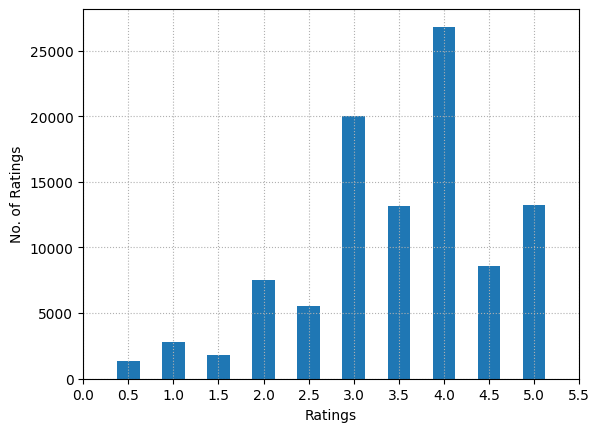

In [3]:
u, inv = np.unique(rating, return_inverse=True)
plt.bar(u, np.bincount(inv), width=0.25)
locs, labels = plt.xticks()  
plt.grid(linestyle=':')
plt.xticks(np.arange(0,6,0.5),rotation=0)
plt.ylabel('No. of Ratings')
plt.xlabel('Ratings')

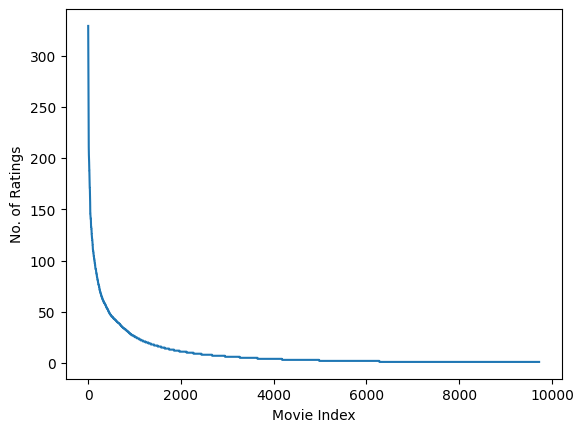

In [4]:
unique, counts = np.unique(movie_id, return_counts=True)
plt.plot(range(1,len(unique)+1),counts[np.argsort(counts)[::-1]])
plt.ylabel('No. of Ratings')
plt.xlabel('Movie Index')
plt.show()

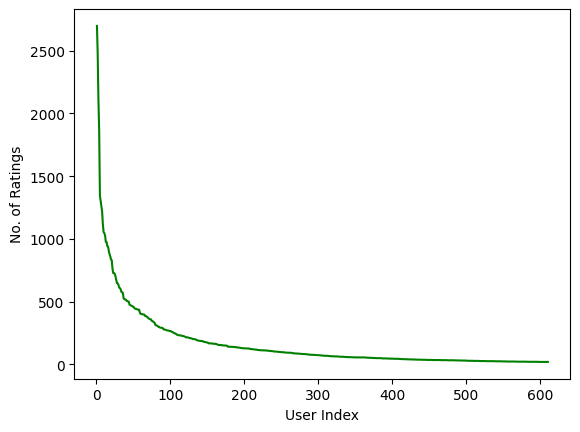

In [5]:
unique, counts = np.unique(user_id, return_counts=True)
plt.plot(range(1,len(unique)+1),counts[np.argsort(counts)[::-1]], color='g')
plt.ylabel('No. of Ratings')
plt.xlabel('User Index')
plt.show()

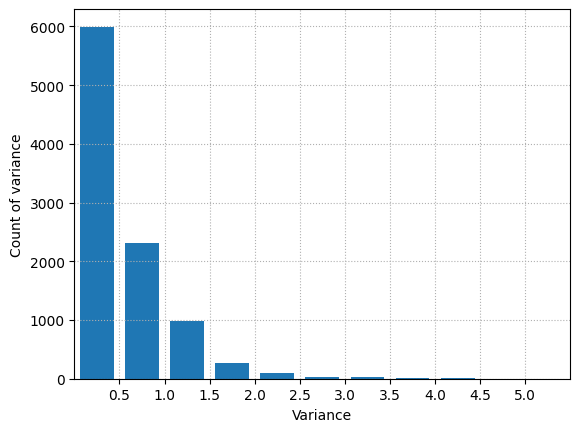

In [6]:
unique_movie_ID = list(set(movie_id))
movie_ID_list = []
var_list = []
for j in range(len(unique_movie_ID)):
    indices = [i for i, x in enumerate(movie_id) if x == unique_movie_ID[j]]
    var = np.var(np.array(rating[indices]))
    movie_ID_list.append(unique_movie_ID[j])
    var_list.append(var)

plt.hist(var_list, bins=np.arange(0,5.5,0.5),rwidth=0.75)
plt.xticks(np.arange(0.5,5.5,0.5))
plt.xlim([0, 5.5])
plt.grid(linestyle=':')
plt.xlabel('Variance')
plt.ylabel('Count of variance')
plt.show()

Question #4

In [3]:
from surprise import Reader, Dataset, accuracy
from surprise.prediction_algorithms.knns import KNNWithMeans, KNNBasic
from surprise.model_selection import cross_validate, KFold, train_test_split

In [4]:
ratings_df = ratings_df[['userId', 'movieId','rating']]
ratings_df.head()

,userId,movieId,rating
0,496,112852,3.0
1,391,1947,4.0
2,387,1562,1.5
3,474,2716,4.5
4,483,88125,4.5


In [5]:
reader = Reader(line_format='user item rating', sep=',',skip_lines=1, rating_scale=(0.5, 5))
rating_data = Dataset.load_from_df(ratings_df, reader=reader)

In [ ]:
avg_rmse = []
avg_mae = []
k = np.linspace(2,100,dtype=int)
for i in k:
    print(i)
    perf = cross_validate(KNNWithMeans(k=i,sim_options={'name':'pearson'}),rating_data,cv=10)
    avg_rmse.append(np.mean(perf['test_rmse']))
    avg_mae.append(np.mean(perf['test_mae']))

2
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
4
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity mat

Text(0.5, 0, 'Number of neighbours')

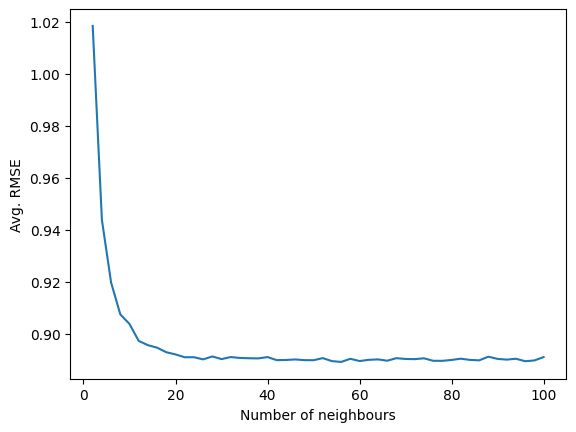

In [ ]:
plt.plot(k,avg_rmse)
plt.ylabel('Avg. RMSE')
plt.xlabel('Number of neighbours')

Text(0.5, 0, 'Number of neighbours')

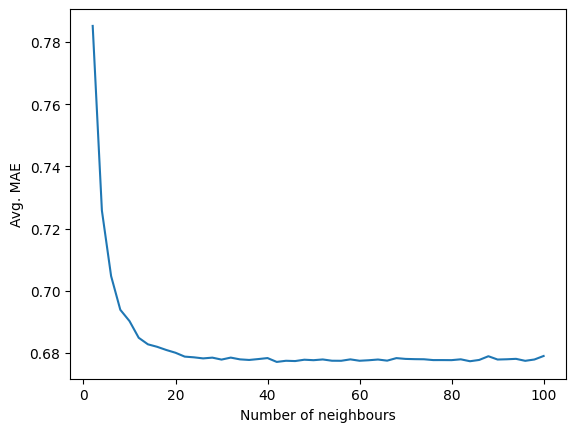

In [ ]:
plt.plot(k,avg_mae)
plt.ylabel('Avg. MAE')
plt.xlabel('Number of neighbours')

Question #5
We reach stability around k = 20

Question #6

In [6]:
def pop_movies_trim(test_set):
    temp_list = []
    unique, counts = np.unique([row[1] for row in test_set], return_counts=True)
    for i in range(len(counts)):
        if(counts[i] > 2):
            temp_list.append(unique[i])
    trimmed_set = [j for j in test_set if j[1] in temp_list]
    return trimmed_set

def unpop_movies_trim(test_set):
    temp_list = []
    unique, counts = np.unique([row[1] for row in test_set], return_counts=True)
    for i in range(len(counts)):
        if(counts[i] <= 2):
            temp_list.append(unique[i])
    trimmed_set = [j for j in test_set if j[1] in temp_list]
    return trimmed_set

In [7]:
from surprise.model_selection import KFold
from surprise import accuracy

kf = KFold(n_splits=10)

pop_rmse = []
for k in range(2,102,2):
    knn = KNNWithMeans(k=k,min_k=1,sim_options={'name':'pearson'},verbose=True)
    rmse_i = []
    for trainset, testset in kf.split(rating_data):
        testset_trim = pop_movies_trim(testset)
        knn.fit(trainset)
        res = knn.test(testset_trim)
        rmse_i.append(accuracy.rmse(res, verbose=True))
    pop_rmse.append(np.mean(rmse_i))

Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0135
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0280
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0208
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0252
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9983
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0332
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0102
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0011
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0143
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0214
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9200
Computing 

In [8]:
unpop_rmse = []
for k in range(2,102,2):
    knn = KNNWithMeans(k=k,min_k=1,sim_options={'name':'pearson'},verbose=True)
    rmse_i = []
    for trainset, testset in kf.split(rating_data):
        testset_trim = unpop_movies_trim(testset)
        knn.fit(trainset)
        res = knn.test(testset_trim)
        rmse_i.append(accuracy.rmse(res, verbose=True))
    unpop_rmse.append(np.mean(rmse_i))

Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0410
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0306
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0279
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0224
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0226
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9986
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0119
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0175
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0121
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0172
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9797
Computing 

In [9]:
var_ref = {}
for j in rating_data.raw_ratings:
    if j[1] in var_ref.keys():
        var_ref[j[1]].append(j[2])
    else:
        var_ref[j[1]] = []
        var_ref[j[1]].append(j[2])

In [ ]:
var_rmse = []
for k in range(2,102,2):
    knn = KNNWithMeans(k=k,min_k=1,sim_options={'name':'pearson'},verbose=True)
    rmse_i = []
    for trainset, testset in kf.split(rating_data):
        knn.fit(trainset)
        highvar_test_trim = [j for j in testset if (np.var(var_ref[j[1]]) >= 2 and len(var_ref[j[1]]) >= 5)]
        res = knn.test(testset_trim)
        rmse_i.append(accuracy.rmse(res, verbose=True))
    var_rmse.append(np.mean(rmse_i))

Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.4157
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.4474
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.4200
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.4367
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.4197
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.4171
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.4738
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.4187
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.4259
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.4251
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.4731
Computing 

Text(0.5, 1.0, 'Popular Movies')

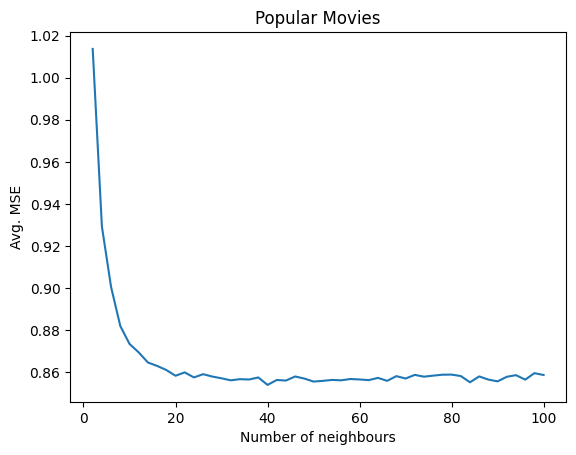

In [ ]:
k = np.arange(2,102,2)
plt.plot(k, pop_rmse)
plt.ylabel('Avg. MSE')
plt.xlabel('Number of neighbours')
plt.title('Popular Movies')

Text(0.5, 1.0, 'Unopular Movies')

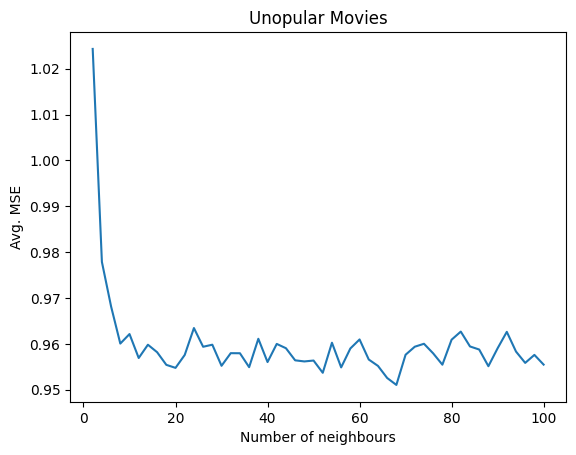

In [ ]:
plt.plot(k, unpop_rmse)
plt.ylabel('Avg. MSE')
plt.xlabel('Number of neighbours')
plt.title('Unopular Movies')

Text(0.5, 1.0, 'High Variance Movies')

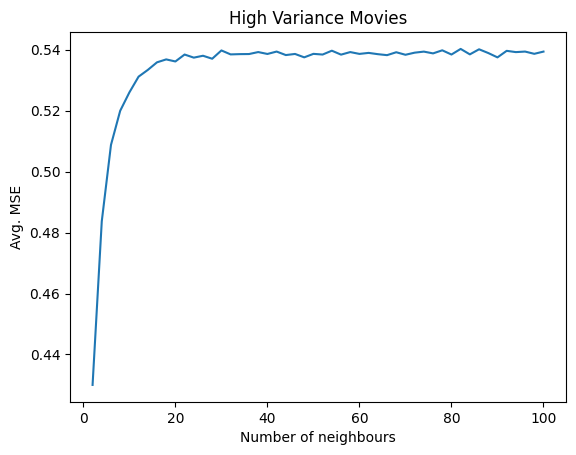

In [ ]:
plt.plot(k, var_rmse)
plt.ylabel('Avg. MSE')
plt.xlabel('Number of neighbours')
plt.title('High Variance Movies')

In [25]:
from sklearn.metrics import roc_curve, auc, mean_squared_error
thresholds = [2.5, 3.0, 3.5, 4.0]
trainset, testset = train_test_split(rating_data, test_size=0.1)
pop_trim = pop_movies_trim(testset)
unpop_trim = unpop_movies_trim(testset)
var_trim = [j for j in testset if (np.var(var_ref[j[1]]) >= 2 and len(var_ref[j[1]]) >= 5)]


In [26]:
res  = KNNWithMeans(k=20,sim_options={'name':'pearson'},verbose=False).fit(trainset).test(testset)
res_pop  = KNNWithMeans(k=20,sim_options={'name':'pearson'},verbose=False).fit(trainset).test(pop_trim)
res_unpop  = KNNWithMeans(k=20,sim_options={'name':'pearson'},verbose=False).fit(trainset).test(pop_trim)
res_var  = KNNWithMeans(k=20,sim_options={'name':'pearson'},verbose=False).fit(trainset).test(var_trim)

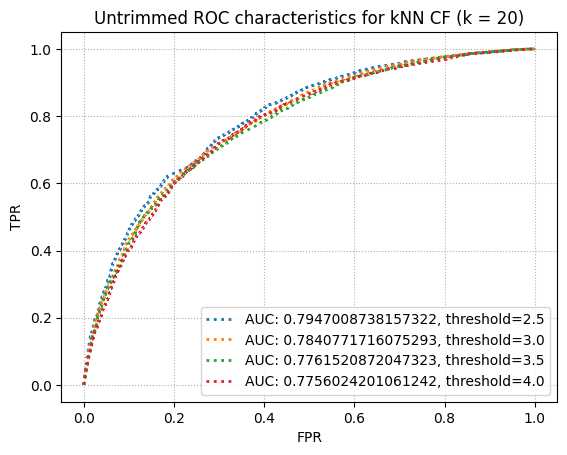

In [27]:
fig, ax = plt.subplots()
for threshold in thresholds:
    untrimmed_thresholded_out = []
    for row in res:
        if row.r_ui > threshold:
            untrimmed_thresholded_out.append(1)
        else:
            untrimmed_thresholded_out.append(0)
    fpr, tpr, _ = roc_curve(untrimmed_thresholded_out, [row.est for row in res])
    ax.plot(fpr, tpr,lw=2,linestyle=':',label="AUC: "+str(auc(fpr,tpr))+', threshold='+str(threshold))  
plt.legend(loc='best')
plt.grid(linestyle=':')
plt.title('Untrimmed ROC characteristics for kNN CF (k = 20)')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show() 

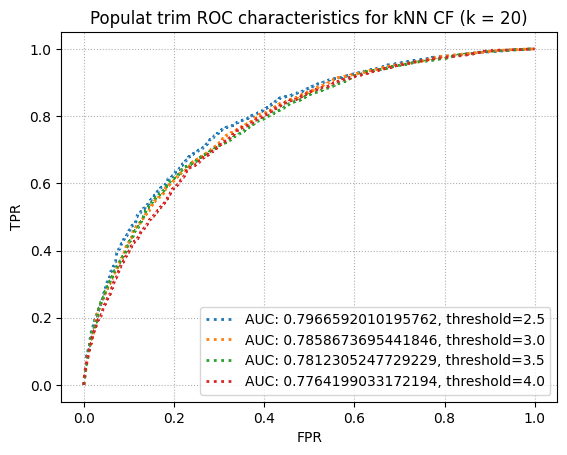

In [28]:
fig1, ax1 = plt.subplots()
for threshold in thresholds:
    pop_trim_thresholded_out = []
    for row in res_pop:
        if row.r_ui > threshold:
            pop_trim_thresholded_out.append(1)
        else:
            pop_trim_thresholded_out.append(0)
    fpr, tpr, _ = roc_curve(pop_trim_thresholded_out, [row.est for row in res_pop])
    ax1.plot(fpr, tpr,lw=2,linestyle=':',label="AUC: "+str(auc(fpr,tpr))+', threshold='+str(threshold))  
plt.legend(loc='best')
plt.grid(linestyle=':')
plt.title('Populat trim ROC characteristics for kNN CF (k = 20)')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show() 

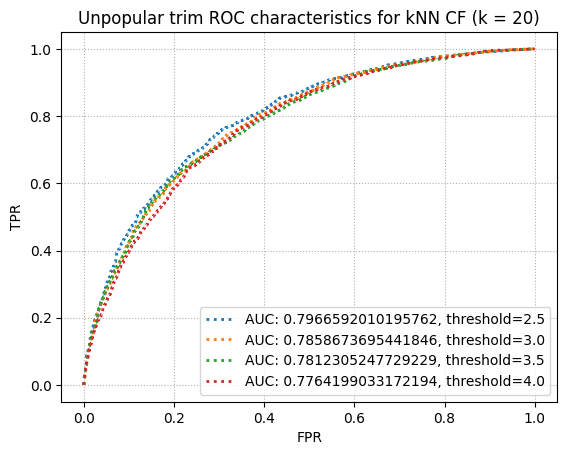

In [29]:
fig, ax = plt.subplots()
for threshold in thresholds:
    unpop_trim_thresholded_out = []
    for row in res_unpop:
        if row.r_ui > threshold:
            unpop_trim_thresholded_out.append(1)
        else:
            unpop_trim_thresholded_out.append(0)
    fpr, tpr, _ = roc_curve(unpop_trim_thresholded_out, [row.est for row in res_unpop])
    ax.plot(fpr, tpr,lw=2,linestyle=':',label="AUC: "+str(auc(fpr,tpr))+', threshold='+str(threshold))  
plt.legend(loc='best')
plt.grid(linestyle=':')
plt.title('Unpopular trim ROC characteristics for kNN CF (k = 20)')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show() 

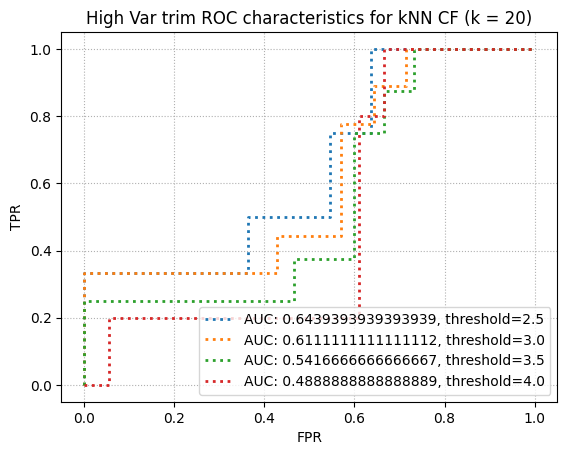

In [30]:
fig, ax = plt.subplots()
for threshold in thresholds:
    var_trim_thresholded_out = []
    for row in res_var:
        if row.r_ui > threshold:
            var_trim_thresholded_out.append(1)
        else:
            var_trim_thresholded_out.append(0)
    fpr, tpr, _ = roc_curve(var_trim_thresholded_out, [row.est for row in res_var])
    ax.plot(fpr, tpr,lw=2,linestyle=':',label="AUC: "+str(auc(fpr,tpr))+', threshold='+str(threshold))  
plt.legend(loc='best')
plt.grid(linestyle=':')
plt.title('High Var trim ROC characteristics for kNN CF (k = 20)')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

Quesiton #8

In [31]:
from surprise.prediction_algorithms.matrix_factorization import NMF, SVD

In [33]:
ks = np.arange(2,50,2)
rmse_NMF = []
mae_NMF = []
for k in ks:
    print(k)
    res = cross_validate(NMF(n_factors= k ,n_epochs=50),measures=['rmse','mae'],data = rating_data,cv=10)   
    rmse_NMF.append(np.mean(res['test_rmse']))
    mae_NMF.append(np.mean(res['test_mae']))

2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
32
34
36
38
40
42
44
46
48


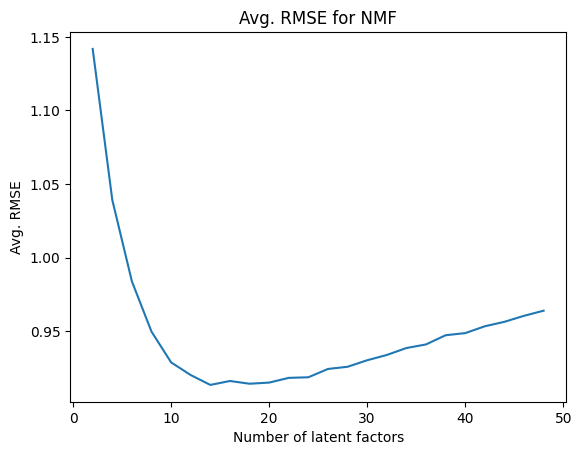

In [36]:
plt.plot(ks,rmse_NMF)
plt.title('Avg. RMSE for NMF')
plt.ylabel('Avg. RMSE')
plt.xlabel('Number of latent factors')
plt.show()

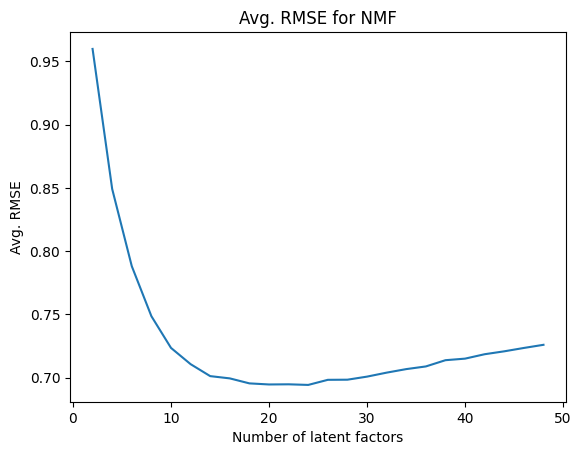

In [37]:
plt.plot(ks,mae_NMF)
plt.title('Avg. RMSE for NMF')
plt.ylabel('Avg. RMSE')
plt.xlabel('Number of latent factors')
plt.show()

In [39]:
nmf_pop_rmse = []
for k in range(2,50,2):
    pop_nmf = NMF(n_factors= k,n_epochs=50)
    rmse_i = []
    for trainset, testset in kf.split(rating_data):
        testset_trim = pop_movies_trim(testset)
        pop_nmf.fit(trainset)
        res = pop_nmf.test(testset_trim)
        rmse_i.append(accuracy.rmse(res, verbose=True))
    nmf_pop_rmse.append(np.mean(rmse_i))

RMSE: 1.1406
RMSE: 1.1491
RMSE: 1.1312
RMSE: 1.1286
RMSE: 1.1293
RMSE: 1.1429
RMSE: 1.1296
RMSE: 1.1437
RMSE: 1.1410
RMSE: 1.1380
RMSE: 1.0047
RMSE: 1.0241
RMSE: 1.0054
RMSE: 1.0194
RMSE: 1.0225
RMSE: 1.0177
RMSE: 1.0030
RMSE: 1.0100
RMSE: 1.0278
RMSE: 1.0074
RMSE: 0.9364
RMSE: 0.9432
RMSE: 0.9527
RMSE: 0.9413
RMSE: 0.9615
RMSE: 0.9479
RMSE: 0.9537
RMSE: 0.9498
RMSE: 0.9497
RMSE: 0.9398
RMSE: 0.9075
RMSE: 0.9061
RMSE: 0.8940
RMSE: 0.9109
RMSE: 0.9134
RMSE: 0.9149
RMSE: 0.9156
RMSE: 0.9030
RMSE: 0.9254
RMSE: 0.9092
RMSE: 0.8852
RMSE: 0.8902
RMSE: 0.9026
RMSE: 0.8866
RMSE: 0.8960
RMSE: 0.8885
RMSE: 0.8756
RMSE: 0.8814
RMSE: 0.8984
RMSE: 0.8860
RMSE: 0.8687
RMSE: 0.8604
RMSE: 0.8771
RMSE: 0.8633
RMSE: 0.8873
RMSE: 0.8983
RMSE: 0.8834
RMSE: 0.8823
RMSE: 0.8723
RMSE: 0.8777
RMSE: 0.8714
RMSE: 0.8664
RMSE: 0.8662
RMSE: 0.8814
RMSE: 0.8804
RMSE: 0.8838
RMSE: 0.8783
RMSE: 0.8695
RMSE: 0.8676
RMSE: 0.8756
RMSE: 0.8706
RMSE: 0.8790
RMSE: 0.8789
RMSE: 0.8610
RMSE: 0.8692
RMSE: 0.8747
RMSE: 0.8642

In [40]:
nmf_unpop_rmse = []
for k in range(2,50,2):
    unpop_nmf = NMF(n_factors= k,n_epochs=50)
    rmse_i = []
    for trainset, testset in kf.split(rating_data):
        testset_trim = unpop_movies_trim(testset)
        unpop_nmf.fit(trainset)
        res = unpop_nmf.test(testset_trim)
        rmse_i.append(accuracy.rmse(res, verbose=True))
    nmf_unpop_rmse.append(np.mean(rmse_i))

RMSE: 1.1564
RMSE: 1.1476
RMSE: 1.1697
RMSE: 1.1579
RMSE: 1.1773
RMSE: 1.1891
RMSE: 1.1487
RMSE: 1.1489
RMSE: 1.1404
RMSE: 1.1610
RMSE: 1.0968
RMSE: 1.0958
RMSE: 1.1162
RMSE: 1.0870
RMSE: 1.0734
RMSE: 1.1058
RMSE: 1.1125
RMSE: 1.0812
RMSE: 1.1042
RMSE: 1.0676
RMSE: 1.0392
RMSE: 1.0757
RMSE: 1.0570
RMSE: 1.0832
RMSE: 1.0552
RMSE: 1.0347
RMSE: 1.0346
RMSE: 1.0466
RMSE: 1.0563
RMSE: 1.0686
RMSE: 1.0194
RMSE: 1.0057
RMSE: 1.0390
RMSE: 1.0471
RMSE: 1.0223
RMSE: 1.0198
RMSE: 1.0399
RMSE: 1.0367
RMSE: 1.0298
RMSE: 1.0270
RMSE: 1.0295
RMSE: 1.0319
RMSE: 1.0268
RMSE: 1.0221
RMSE: 1.0109
RMSE: 0.9956
RMSE: 1.0213
RMSE: 1.0156
RMSE: 1.0173
RMSE: 0.9869
RMSE: 0.9938
RMSE: 1.0085
RMSE: 1.0062
RMSE: 0.9990
RMSE: 1.0078
RMSE: 1.0085
RMSE: 0.9790
RMSE: 1.0124
RMSE: 1.0166
RMSE: 1.0249
RMSE: 0.9879
RMSE: 0.9889
RMSE: 0.9866
RMSE: 0.9875
RMSE: 0.9844
RMSE: 1.0055
RMSE: 1.0070
RMSE: 1.0114
RMSE: 1.0022
RMSE: 0.9972
RMSE: 0.9944
RMSE: 0.9892
RMSE: 1.0383
RMSE: 1.0064
RMSE: 0.9833
RMSE: 0.9927
RMSE: 1.0199

In [41]:
nmf_var_rmse = []
for k in range(2,50,2):
    var_nmf = NMF(n_factors= k,n_epochs=50)
    rmse_i = []
    for trainset, testset in kf.split(rating_data):
        highvar_test_trim = [j for j in testset if (np.var(var_ref[j[1]]) >= 2 and len(var_ref[j[1]]) >= 5)]
        var_nmf.fit(trainset)
        res = var_nmf.test(highvar_test_trim)
        rmse_i.append(accuracy.rmse(res, verbose=True))
    nmf_var_rmse.append(np.mean(rmse_i))

RMSE: 1.7689
RMSE: 1.6831
RMSE: 2.1088
RMSE: 1.5112
RMSE: 1.7286
RMSE: 1.7281
RMSE: 1.5938
RMSE: 1.6155
RMSE: 1.5950
RMSE: 1.8272
RMSE: 1.7483
RMSE: 1.7868
RMSE: 1.7698
RMSE: 1.5417
RMSE: 1.4632
RMSE: 1.6966
RMSE: 1.7205
RMSE: 1.9511
RMSE: 1.5825
RMSE: 2.0348
RMSE: 1.7876
RMSE: 1.7292
RMSE: 1.8479
RMSE: 1.6298
RMSE: 1.5090
RMSE: 1.8726
RMSE: 1.8517
RMSE: 1.7815
RMSE: 1.1841
RMSE: 1.5213
RMSE: 1.5546
RMSE: 1.7870
RMSE: 1.8380
RMSE: 1.5067
RMSE: 1.6152
RMSE: 1.6015
RMSE: 1.4914
RMSE: 1.7239
RMSE: 1.8400
RMSE: 1.5679
RMSE: 1.6169
RMSE: 1.5228
RMSE: 1.7190
RMSE: 1.5009
RMSE: 1.5862
RMSE: 1.6480
RMSE: 1.6635
RMSE: 1.5503
RMSE: 2.0042
RMSE: 1.8736
RMSE: 1.4872
RMSE: 1.9249
RMSE: 1.8167
RMSE: 1.2429
RMSE: 1.7598
RMSE: 1.3676
RMSE: 1.8372
RMSE: 1.7652
RMSE: 1.7754
RMSE: 1.6888
RMSE: 1.8786
RMSE: 1.8851
RMSE: 2.1191
RMSE: 1.2158
RMSE: 1.4124
RMSE: 1.5192
RMSE: 1.8059
RMSE: 1.5638
RMSE: 2.0719
RMSE: 1.2444
RMSE: 2.0285
RMSE: 2.3165
RMSE: 1.5037
RMSE: 1.8308
RMSE: 1.6798
RMSE: 1.3942
RMSE: 1.5828

In [43]:
movie_df = pd.read_csv('movies.csv')
trainset, testset = train_test_split(rating_data, test_size=0.1)
nmf = NMF(n_factors=20,n_epochs=50,verbose=False)
nmf.fit(trainset).test(testset)
U = nmf.pu
V = nmf.qi

In [44]:
for i in range(5):
    print(i)
    selected_col = V[:,i]
    sorted_col = np.argsort(selected_col)[::-1]
    for i in sorted_col[0:10]:
        print(movie_df['genres'][i])

0
Drama|Thriller
Comedy|Horror
Action|Adventure|Fantasy
Drama|Thriller
Comedy|Musical|Romance
Romance
Comedy
Animation|Drama|Romance
Comedy|Musical
Drama|Romance
1
Crime|Thriller
Drama|Romance
Action|Drama|Romance|Sci-Fi
Drama|Romance
Drama|Thriller
Action
Horror|Thriller
Drama|Horror|Mystery|Thriller
Action|Sci-Fi|Thriller
Comedy|Drama
2
Comedy
Comedy|Drama
Comedy|Drama|Romance
Adventure|Animation|Comedy
Comedy|Horror
Comedy|Drama
Action|Horror|Thriller
Comedy
Drama
Action|Adventure|Animation|Children|Comedy|IMAX
3
Drama|Romance
Crime|Drama
Action|Crime|Thriller
Adventure|Drama
Action|Comedy
Drama|Romance
Documentary
Action|Adventure|Sci-Fi|Thriller|War
Comedy
Drama
4
Action|Comedy
Drama
Drama|Romance
Drama|Romance
Animation|Drama
Comedy|Drama|Romance
Comedy|Drama
Adventure|Drama|Horror|Sci-Fi|Thriller
Action|Crime|Thriller
Action|Children|Romance


Question #10

In [46]:
ks = np.arange(2,50,2)
rmse_SVD = []
mae_SVD = []
for k in ks:
    print(k)
    res = cross_validate(SVD(n_factors= k ,n_epochs=50),measures=['rmse','mae'],data = rating_data,cv=10)   
    rmse_SVD.append(np.mean(res['test_rmse']))
    mae_SVD.append(np.mean(res['test_mae']))

2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
32
34
36
38
40
42
44
46
48


In [47]:
mf_pop_rmse = []
for k in range(2,50,2):
    pop_mf = SVD(n_factors= k ,n_epochs=50)
    rmse_i = []
    for trainset, testset in kf.split(rating_data):
        testset_trim = pop_movies_trim(testset)
        pop_mf.fit(trainset)
        res = pop_mf.test(testset_trim)
        rmse_i.append(accuracy.rmse(res, verbose=True))
    mf_pop_rmse.append(np.mean(rmse_i))

RMSE: 0.8611
RMSE: 0.8336
RMSE: 0.8384
RMSE: 0.8464
RMSE: 0.8473
RMSE: 0.8669
RMSE: 0.8388
RMSE: 0.8623
RMSE: 0.8681
RMSE: 0.8453
RMSE: 0.8638
RMSE: 0.8497
RMSE: 0.8619
RMSE: 0.8284
RMSE: 0.8443
RMSE: 0.8597
RMSE: 0.8551
RMSE: 0.8463
RMSE: 0.8474
RMSE: 0.8423
RMSE: 0.8650
RMSE: 0.8458
RMSE: 0.8634
RMSE: 0.8472
RMSE: 0.8449
RMSE: 0.8635
RMSE: 0.8588
RMSE: 0.8387
RMSE: 0.8466
RMSE: 0.8449
RMSE: 0.8464
RMSE: 0.8606
RMSE: 0.8274
RMSE: 0.8554
RMSE: 0.8584
RMSE: 0.8609
RMSE: 0.8581
RMSE: 0.8463
RMSE: 0.8634
RMSE: 0.8531
RMSE: 0.8722
RMSE: 0.8642
RMSE: 0.8721
RMSE: 0.8526
RMSE: 0.8745
RMSE: 0.8644
RMSE: 0.8578
RMSE: 0.8575
RMSE: 0.8435
RMSE: 0.8571
RMSE: 0.8908
RMSE: 0.8680
RMSE: 0.8800
RMSE: 0.8457
RMSE: 0.8702
RMSE: 0.8525
RMSE: 0.8497
RMSE: 0.8540
RMSE: 0.8529
RMSE: 0.8671
RMSE: 0.8758
RMSE: 0.8686
RMSE: 0.8494
RMSE: 0.8687
RMSE: 0.8631
RMSE: 0.8678
RMSE: 0.8538
RMSE: 0.8753
RMSE: 0.8459
RMSE: 0.8775
RMSE: 0.8765
RMSE: 0.8807
RMSE: 0.8635
RMSE: 0.8594
RMSE: 0.8707
RMSE: 0.8462
RMSE: 0.8736

In [49]:
mf_unpop_rmse = []
for k in range(2,50,2):
    unpop_mf = SVD(n_factors= k ,n_epochs=50)
    rmse_i = []
    for trainset, testset in kf.split(rating_data):
        testset_trim = unpop_movies_trim(testset)
        unpop_mf.fit(trainset)
        res = unpop_mf.test(testset_trim)
        rmse_i.append(accuracy.rmse(res, verbose=True))
    mf_unpop_rmse.append(np.mean(rmse_i))

RMSE: 0.8861
RMSE: 0.8956
RMSE: 0.8903
RMSE: 0.8856
RMSE: 0.8956
RMSE: 0.9050
RMSE: 0.9131
RMSE: 0.8774
RMSE: 0.9078
RMSE: 0.8886
RMSE: 0.8859
RMSE: 0.9041
RMSE: 0.8836
RMSE: 0.9193
RMSE: 0.9135
RMSE: 0.9039
RMSE: 0.8986
RMSE: 0.9022
RMSE: 0.8919
RMSE: 0.8882
RMSE: 0.9045
RMSE: 0.9257
RMSE: 0.9031
RMSE: 0.8796
RMSE: 0.9025
RMSE: 0.8914
RMSE: 0.8912
RMSE: 0.9076
RMSE: 0.9030
RMSE: 0.8887
RMSE: 0.9068
RMSE: 0.8932
RMSE: 0.9005
RMSE: 0.8905
RMSE: 0.8896
RMSE: 0.9097
RMSE: 0.8951
RMSE: 0.9141
RMSE: 0.9217
RMSE: 0.9102
RMSE: 0.8989
RMSE: 0.8923
RMSE: 0.9107
RMSE: 0.8999
RMSE: 0.9075
RMSE: 0.9029
RMSE: 0.9128
RMSE: 0.8913
RMSE: 0.9333
RMSE: 0.8714
RMSE: 0.9024
RMSE: 0.8778
RMSE: 0.9145
RMSE: 0.9032
RMSE: 0.9076
RMSE: 0.9142
RMSE: 0.8818
RMSE: 0.9012
RMSE: 0.9319
RMSE: 0.8922
RMSE: 0.9132
RMSE: 0.9115
RMSE: 0.8938
RMSE: 0.9006
RMSE: 0.9123
RMSE: 0.9025
RMSE: 0.8938
RMSE: 0.8864
RMSE: 0.8957
RMSE: 0.9114
RMSE: 0.9124
RMSE: 0.8770
RMSE: 0.9330
RMSE: 0.9120
RMSE: 0.8814
RMSE: 0.8937
RMSE: 0.9076

In [50]:
mf_var_rmse = []
for k in range(2,50,2):
    var_mf = SVD(n_factors= k ,n_epochs=50)
    rmse_i = []
    for trainset, testset in kf.split(rating_data):
        highvar_test_trim = [j for j in testset if (np.var(var_ref[j[1]]) >= 2 and len(var_ref[j[1]]) >= 5)]
        var_mf.fit(trainset)
        res = var_mf.test(highvar_test_trim)
        rmse_i.append(accuracy.rmse(res, verbose=True))
    mf_var_rmse.append(np.mean(rmse_i))

RMSE: 1.4525
RMSE: 1.3433
RMSE: 1.5581
RMSE: 1.7987
RMSE: 1.5773
RMSE: 1.3858
RMSE: 1.5171
RMSE: 1.5969
RMSE: 1.6376
RMSE: 1.5612
RMSE: 1.0879
RMSE: 1.5180
RMSE: 1.7505
RMSE: 1.5128
RMSE: 1.4240
RMSE: 1.8517
RMSE: 1.5744
RMSE: 1.6614
RMSE: 1.1552
RMSE: 1.8455
RMSE: 1.2535
RMSE: 1.4921
RMSE: 1.3861
RMSE: 1.5478
RMSE: 1.4301
RMSE: 1.6846
RMSE: 1.6019
RMSE: 1.5091
RMSE: 1.6382
RMSE: 1.7304
RMSE: 1.5584
RMSE: 1.4052
RMSE: 1.6593
RMSE: 1.3614
RMSE: 1.5160
RMSE: 1.6578
RMSE: 1.5245
RMSE: 1.7545
RMSE: 1.2410
RMSE: 1.4849
RMSE: 1.5874
RMSE: 1.7205
RMSE: 1.5567
RMSE: 1.4403
RMSE: 1.5285
RMSE: 1.2311
RMSE: 1.5016
RMSE: 1.6866
RMSE: 1.4148
RMSE: 1.4270
RMSE: 1.3311
RMSE: 1.5763
RMSE: 1.4977
RMSE: 1.5608
RMSE: 1.5421
RMSE: 1.9020
RMSE: 1.4410
RMSE: 1.5571
RMSE: 1.5250
RMSE: 1.5041
RMSE: 1.5672
RMSE: 1.8215
RMSE: 1.3116
RMSE: 1.6122
RMSE: 1.6016
RMSE: 1.5560
RMSE: 0.8920
RMSE: 1.3051
RMSE: 1.7356
RMSE: 1.4326
RMSE: 1.7058
RMSE: 1.3554
RMSE: 1.4610
RMSE: 1.6114
RMSE: 1.4051
RMSE: 1.4411
RMSE: 1.6552

Text(0.5, 1.0, 'Popular Movies (MF)')

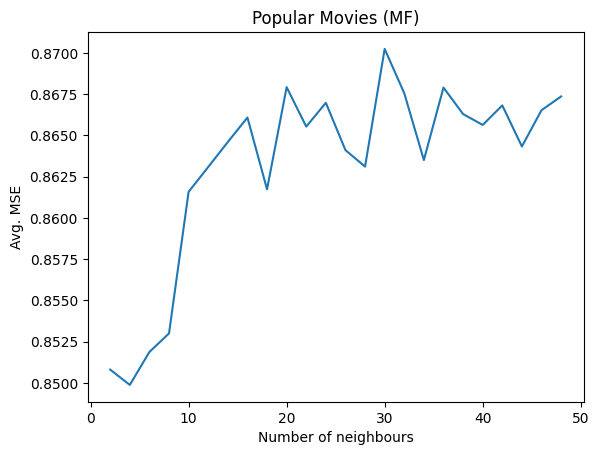

In [51]:
k = np.arange(2,50,2)
plt.plot(k, mf_pop_rmse)
plt.ylabel('Avg. MSE')
plt.xlabel('Number of neighbours')
plt.title('Popular Movies (MF)')

Text(0.5, 1.0, 'Unpopular Movies (MF)')

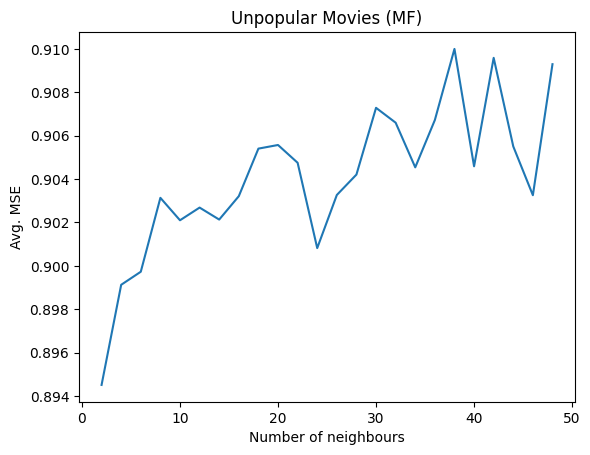

In [53]:
plt.plot(k, mf_unpop_rmse)
plt.ylabel('Avg. MSE')
plt.xlabel('Number of neighbours')
plt.title('Unpopular Movies (MF)')

Text(0.5, 1.0, 'Popular Movies (MF)')

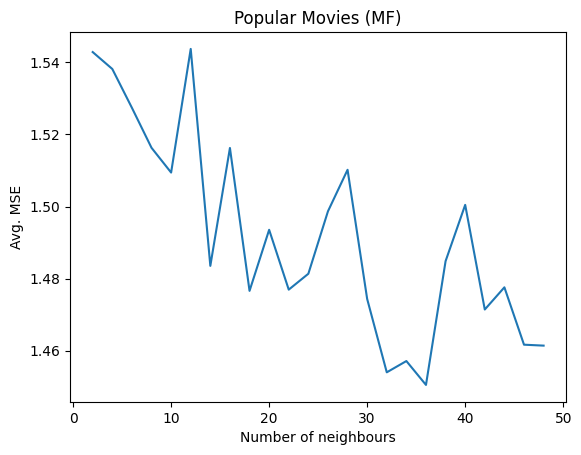

In [54]:
plt.plot(k, mf_var_rmse)
plt.ylabel('Avg. MSE')
plt.xlabel('Number of neighbours')
plt.title('Popular Movies (MF)')

In [55]:
thresholds = [2.5, 3.0, 3.5, 4.0]
trainset, testset = train_test_split(rating_data, test_size=0.1)
pop_trim = pop_movies_trim(testset)
unpop_trim = unpop_movies_trim(testset)
var_trim = [j for j in testset if (np.var(var_ref[j[1]]) >= 2 and len(var_ref[j[1]]) >= 5)]

res_svd  = SVD(n_factors= 22 ,n_epochs=50).fit(trainset).test(testset)
res_pop_svd  = SVD(n_factors= 22 ,n_epochs=50).fit(trainset).test(pop_trim)
res_unpop_svd  = SVD(n_factors= 22 ,n_epochs=50).fit(trainset).test(pop_trim)
res_var_svd  = SVD(n_factors= 22 ,n_epochs=50).fit(trainset).test(var_trim)

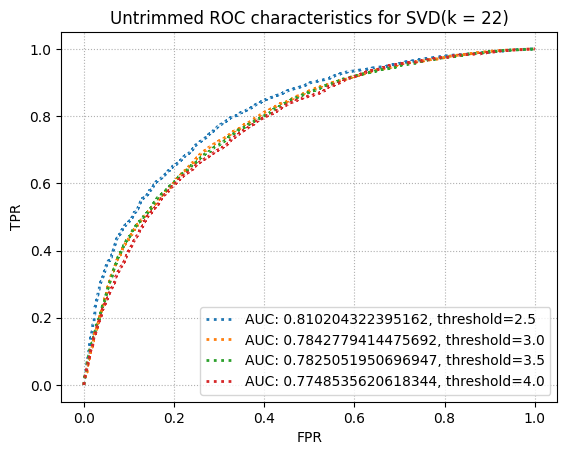

In [56]:
fig1, ax1 = plt.subplots()
for threshold in thresholds:
    thresholded_out = []
    for row in res_svd:
        if row.r_ui > threshold:
            thresholded_out.append(1)
        else:
            thresholded_out.append(0)
    fpr, tpr, _ = roc_curve(thresholded_out, [row.est for row in res_svd])
    ax1.plot(fpr, tpr,lw=2,linestyle=':',label="AUC: "+str(auc(fpr,tpr))+', threshold='+str(threshold))  
plt.legend(loc='best')
plt.grid(linestyle=':')
plt.title('Untrimmed ROC characteristics for SVD(k = 22)')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show() 

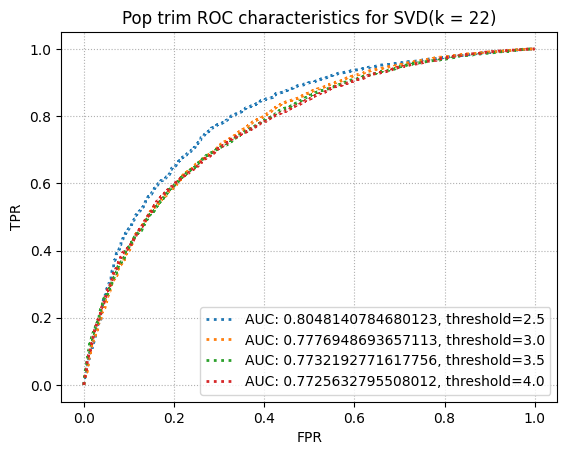

In [58]:
fig1, ax1 = plt.subplots()
for threshold in thresholds:
    thresholded_pop_svd_out = []
    for row in res_pop_svd:
        if row.r_ui > threshold:
            thresholded_pop_svd_out.append(1)
        else:
            thresholded_pop_svd_out.append(0)
    fpr, tpr, _ = roc_curve(thresholded_pop_svd_out, [row.est for row in res_pop_svd])
    ax1.plot(fpr, tpr,lw=2,linestyle=':',label="AUC: "+str(auc(fpr,tpr))+', threshold='+str(threshold))  
plt.legend(loc='best')
plt.grid(linestyle=':')
plt.title('Pop trim ROC characteristics for SVD(k = 22)')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show() 

Text(0, 0.5, 'TPR')

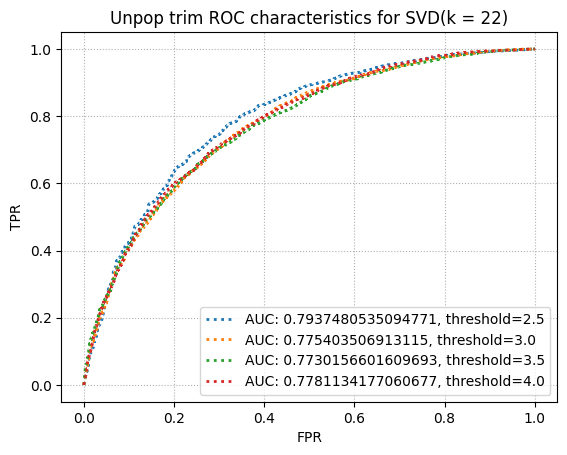

In [61]:
fig1, ax1 = plt.subplots()
for threshold in thresholds:
    thresholded_unpop_svd_out = []
    for row in res_unpop_svd:
        if row.r_ui > threshold:
            thresholded_unpop_svd_out.append(1)
        else:
            thresholded_unpop_svd_out.append(0)
    fpr, tpr, _ = roc_curve(thresholded_unpop_svd_out, [row.est for row in res_unpop_svd])
    ax1.plot(fpr, tpr,lw=2,linestyle=':',label="AUC: "+str(auc(fpr,tpr))+', threshold='+str(threshold))  
plt.legend(loc='best')
plt.grid(linestyle=':')
plt.title('Unpop trim ROC characteristics for SVD(k = 22)')
plt.xlabel('FPR')
plt.ylabel('TPR')

Text(0, 0.5, 'TPR')

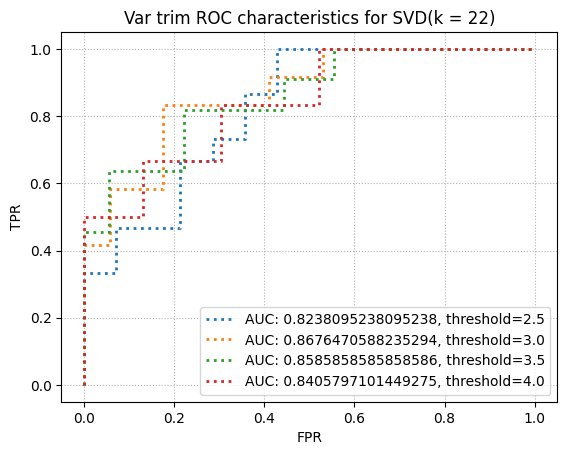

In [62]:
fig1, ax1 = plt.subplots()
for threshold in thresholds:
    thresholded_var_svd_out = []
    for row in res_var_svd:
        if row.r_ui > threshold:
            thresholded_var_svd_out.append(1)
        else:
            thresholded_var_svd_out.append(0)
    fpr, tpr, _ = roc_curve(thresholded_var_svd_out, [row.est for row in res_var_svd])
    ax1.plot(fpr, tpr,lw=2,linestyle=':',label="AUC: "+str(auc(fpr,tpr))+', threshold='+str(threshold))  
plt.legend(loc='best')
plt.grid(linestyle=':')
plt.title('Var trim ROC characteristics for SVD(k = 22)')
plt.xlabel('FPR')
plt.ylabel('TPR')

Question #11

In [76]:
ncf_ref = {}
for j in rating_data.raw_ratings:
    if j[0] in ncf_ref.keys():
        ncf_ref[j[0]].append(j[2])
    else:
        ncf_ref[j[0]] = []
        ncf_ref[j[0]].append(j[2])

user = {}
for j in ncf_ref.keys():
    user[j] = np.mean(ncf_ref[j])

In [77]:
rmse = 0
kf = KFold(n_splits=10)
for trainset, testset in kf.split(rating_data):
    pred = [user[i[0]] for i in testset]
    true = [i[2] for i in testset]
    rmse += np.sqrt(mean_squared_error(true,pred))
avg_rmse = rmse/10.0

print('Naive COllaborative Filter RSME (AVG): ', avg_rmse)

Naive COllaborative Filter RSME (AVG):  0.9346618071963413


Question #12

In [78]:
trainset, testset = train_test_split(rating_data, test_size=0.1)
res_SVD  = SVD(n_factors=22,n_epochs=20,verbose=False).fit(trainset).test(testset)
res_NMF  = NMF(n_factors=16,n_epochs=50,verbose=False).fit(trainset).test(testset)
res_KNN = KNNWithMeans(k=20,sim_options={'name':'pearson'},verbose=False).fit(trainset).test(testset)

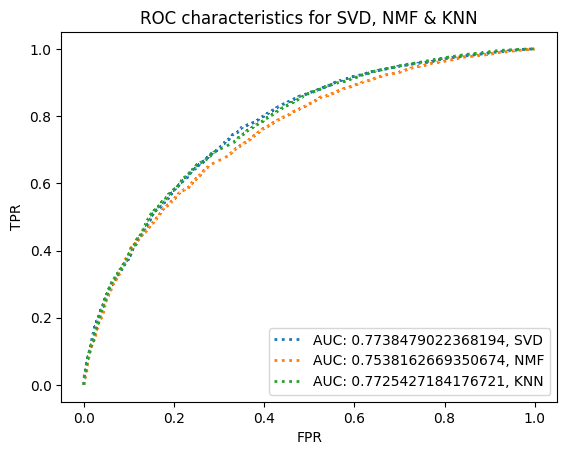

In [84]:
fig, ax = plt.subplots()
thresholded_out = []
for row in res_SVD:
    if row.r_ui > 3:
        thresholded_out.append(1)
    else:
        thresholded_out.append(0)
fpr, tpr, thresholds = roc_curve(thresholded_out, [row.est for row in res_SVD])
ax.plot(fpr, tpr,lw=2,linestyle=':',label="AUC: "+str(auc(fpr,tpr))+', SVD')  

thresholded_out = []
for row in res_NMF:
    if row.r_ui > 3:
        thresholded_out.append(1)
    else:
        thresholded_out.append(0)
fpr, tpr, thresholds = roc_curve(thresholded_out, [row.est for row in res_NMF])
ax.plot(fpr, tpr,lw=2,linestyle=':',label="AUC: "+str(auc(fpr,tpr))+', NMF')  

thresholded_out = []
for row in res_KNN:
    if row.r_ui > 3:
        thresholded_out.append(1)
    else:
        thresholded_out.append(0)
fpr, tpr, thresholds = roc_curve(thresholded_out, [row.est for row in res_KNN])
ax.plot(fpr, tpr,lw=2,linestyle=':',label="AUC: "+str(auc(fpr,tpr))+', KNN')  

plt.legend(loc='best')
plt.title('ROC characteristics for SVD, NMF & KNN')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

Question #14

In [88]:
def return_likes_ratings(testset):
    G = {} #dictionary of movies liked by users
    for row in testset:
        if row[0] in G.keys():
            if row[2] >= 3.0:
                G[row[0]].add(row[1])
        else:
            G[row[0]] = set()
            if row[2] >= 3.0:
                G[row[0]].add(row[1])    
    dict_of_items = {} #dictionary of all movies rated by users
    for row in testset:
        if row[0] in dict_of_items.keys():
            dict_of_items[row[0]].append(row[1])
        else:
            dict_of_items[row[0]] = []
            dict_of_items[row[0]].append(row[1])
    return G, dict_of_items 

In [89]:
# NMF
prec_list_nmf = []
rec_list_nmf = []
for val in range(1,26):
    print(val)
    precision_set = []
    recall_set = []
    for trainset, testset in kf.split(rating_data):
        G, dict_of_items = return_likes_ratings(testset)
        mod_testset = [row for row in testset if (len(dict_of_items[row[0]]) >= val and len(G[row[0]]) > 0)]
        res = NMF(n_factors=16,n_epochs=50,verbose=False).fit(trainset).test(mod_testset)
        est_rat = {} #dictionary of estimated ratings by users
        for row in res:
            if row[0] in est_rat.keys():
                est_rat[row[0]].append((row[1],row[3]))
            else:
                est_rat[row[0]] = []
                est_rat[row[0]].append((row[1],row[3]))
        precision_u = []
        recall_u = []
        for item in est_rat.keys():
            S_all = est_rat[item]
            S_all = sorted(S_all,key=lambda x:x[1],reverse=True)
            S_t = set([row[0] for row in S_all[0:val]])
            precision_u.append(len(S_t.intersection(G[item]))/float(len(S_t)))
            recall_u.append(len(S_t.intersection(G[item]))/float(len(G[item])))
        precision_set.append(np.mean(precision_u))
        recall_set.append(np.mean(recall_u))
    prec_list_nmf.append(np.mean(precision_set))
    rec_list_nmf.append(np.mean(recall_set))

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25


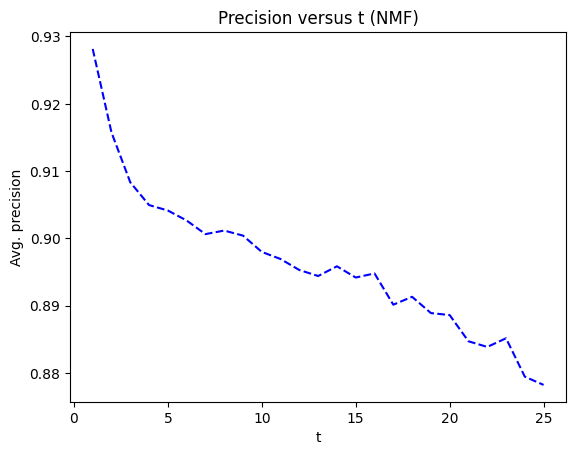

In [91]:
plt.plot(np.arange(1,26,1),prec_list_nmf,linestyle='--',color='b')
plt.title('Precision versus t (NMF)')
plt.ylabel('Avg. precision')
plt.xlabel('t')
plt.show()

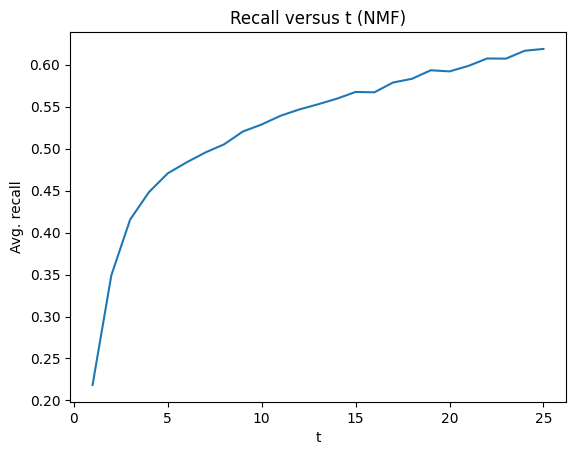

In [92]:
plt.plot(np.arange(1,26,1),rec_list_nmf)
plt.title('Recall versus t (NMF)')
plt.ylabel('Avg. recall')
plt.xlabel('t')
plt.show()

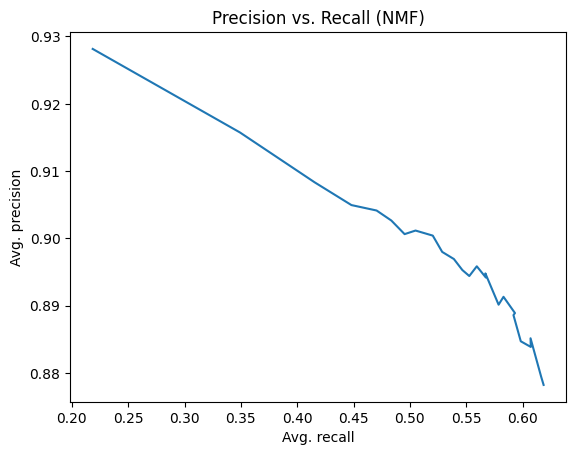

In [93]:
plt.plot(rec_list_nmf,prec_list_nmf)
plt.title('Precision vs. Recall (NMF)')
plt.ylabel('Avg. precision')
plt.xlabel('Avg. recall')
plt.show()